In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
image = cv2.imread('./pineapples_5m/train2017/00000001_JPG.rf.df961743d1f042ca41cc9fe7eb2dc0b5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

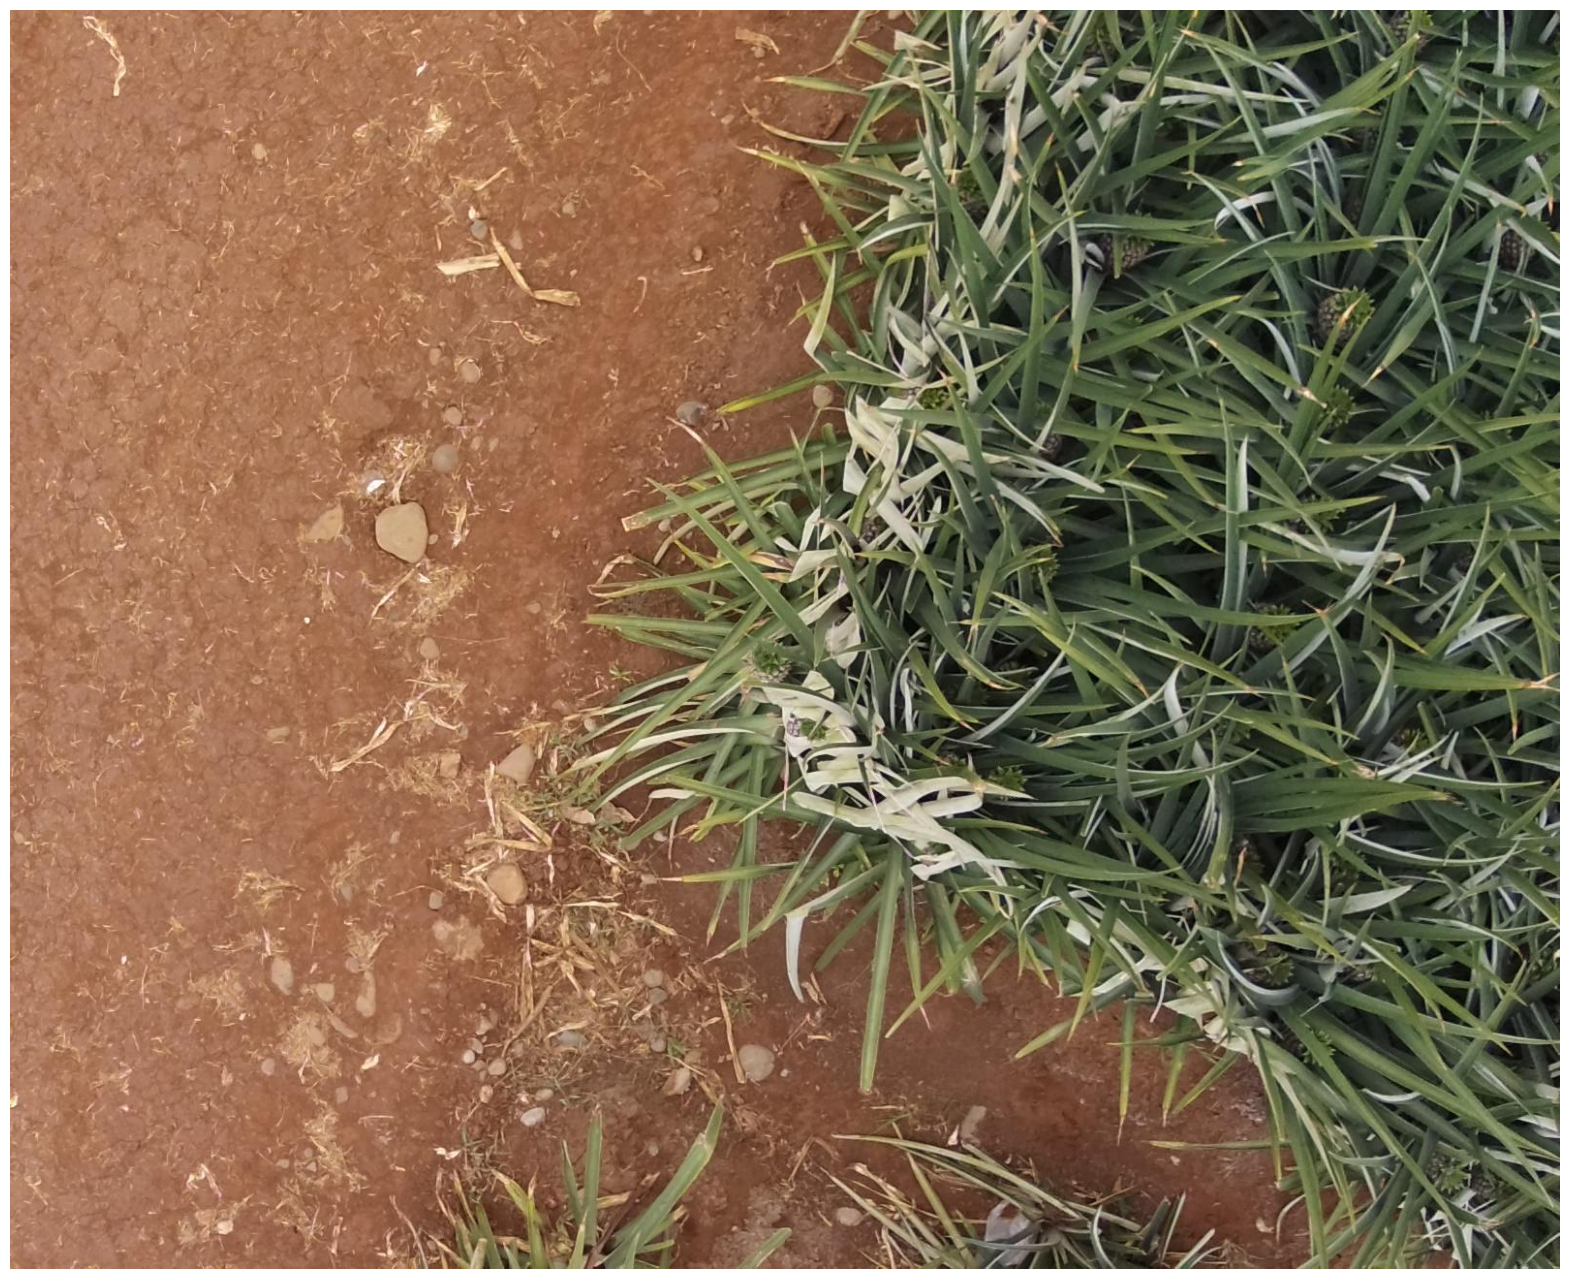

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [2]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from PIL import Image
import numpy as np

sam_checkpoint = "./weights/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)


new_pil = Image.new(mode="RGB", size=(200,200))
predictor = SamPredictor(sam) 
predictor.set_image(np.array(new_pil))

mask_generator = SamAutomaticMaskGenerator(
            model=sam,
            points_per_side=32,
            # pred_iou_thresh=0.9,
            # stability_score_thresh=0.96,
            # crop_n_layers=1, default:0
            # crop_n_points_downscale_factor=1,default:1
            min_mask_region_area=100,  # Requires open-cv to run post-processing
            output_mode="coco_rle",
        )

In [ ]:
masks = mask_generator.generate(image)

In [ ]:
print(len(masks))
print(masks[0].keys())

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 